# ROC 曲线（Receiver Operation Characteristic Curve）

- 描述 TPR 和 FPR 之间的关系
- TPR - true positive rate （recall）:预测为 1，并且预测对了的数量占真实值为 1  的百分比
$$FPR = \frac{TP}{TP + FN}$$
- FPR - false Positive rate ：预测为 1，但是预测错了的数量占真实值不为 1 的百分比
$$FPR = \frac{FP}{FP + TN}$$

[![LOR13.png](https://i.postimg.cc/ncRJPBqX/LOR13.png)](https://postimg.cc/0bwF66Wv)

### 1. 训练模型

In [7]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
digits = datasets.load_digits()

X = digits.data
y = digits.target.copy()

# 把十个数字分类问题转化成二分类问题. 把数据集变成一个极度偏斜的数据集
y[digits.target==9] = 1
y[digits.target!=9] = 0

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class='auto')
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

D:\appCommon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
from LogisticReg.metrics import TPR, FPR

tprs = []
fprs = []
# 对于不同的 thresholds, TPR 和 FPR 的变化
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    tprs.append(FPR(y_test, y_predict))
    fprs.append(TPR(y_test, y_predict))

### 2. 绘制 ROC 曲线

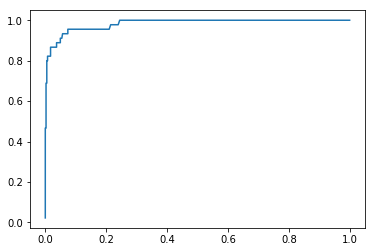

In [13]:
plt.plot(tprs, fprs)

### 3. scikit-learn 中的 ROC 曲线

In [14]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

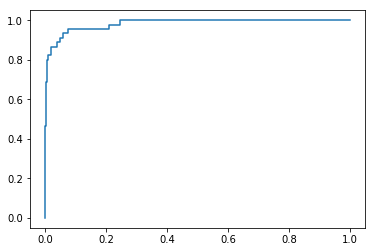

In [17]:
plt.plot(fprs, tprs)